In [45]:
import pandas as pd
import requests
from fancyimpute import IterativeImputer 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity


# Our project will handle two analysis of data : 
# -one will be for accurate data which means that we will only depend on the data coming from the api's and we will ignore the NaN's 
# -the second one will combine two approaches one will be for estimated NaN values we will depend on the average of the column in question and the other is the api

the first dataframe called az_data that will depend on accurate data

In [102]:
file_path = "./amazon_data_VA.csv"
az_data = pd.read_csv(file_path, parse_dates=True)
az_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,vote_average
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...,7.0
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,7.4
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...,4.2
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ...",6.0
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...,7.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",NaN,NaN,1940,7+,60 min,Comedy,New York City street principles get an East Si...,5.9
9664,s9665,TV Show,Planet Patrol,NaN,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",NaN,NaN,2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve...",7.5
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",NaN,NaN,2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou...",5.8
9666,s9667,TV Show,Maradona: Blessed Dream,NaN,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",NaN,NaN,2021,TV-MA,1 Season,"Drama, Sports","The series tells the story of Diego Maradona, ...",7.1


In [ ]:
the second dataframe which will depend on the average

In [103]:
path = "./amazon_data_VA_P.csv"
estimated_data = pd.read_csv(path, parse_dates=True)
estimated_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,vote_average,popularity
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...,7.0,7.785
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,7.4,1.422
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...,4.2,4.711
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ...",6.0,0.994
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...,7.2,0.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",NaN,NaN,1940,7+,60 min,Comedy,New York City street principles get an East Si...,5.9,0.943
9664,s9665,TV Show,Planet Patrol,NaN,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",NaN,NaN,2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve...",7.5,NaN
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",NaN,NaN,2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou...",5.8,9.293
9666,s9667,TV Show,Maradona: Blessed Dream,NaN,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",NaN,NaN,2021,TV-MA,1 Season,"Drama, Sports","The series tells the story of Diego Maradona, ...",7.1,16.880


Remove duplicates from the two dataframes and keep the first occurrence

In [ ]:
duplicates = az_data.duplicated(keep=False)
estimated_dups = estimated_data.duplicated(keep=False)
az_data.drop_duplicates(subset=['title'], keep='first', inplace=True)
estimated_data.drop_duplicates(subset=['title'], keep='first', inplace=True)

# Check for duplicates in the 'title' and 'year' columns
duplicate_rows = az_data[duplicates]
estima_duplicate_rows = estimated_data[duplicates]


Getting Data for vote average in omdb api for the two dataframes

first for az_data

In [16]:
apikeys = ["87d2353d","63f450f9","2b63559e","277f896","8750eea7","683567df"]

count = 0
apikey =apikeys[0]
count = 0

for index, row in az_data.iterrows():
    if pd.isna(row['vote_average']):
        try:
            data = getDataOmdb(row['title'], apikey)
            if data['Response'] == "False" and data['Error'] == "Request limit reached!":
                count += 1
                if count == len(apikeys):
                    break
                else :
                    apikey = apikeys[count]
                    print(apikey)
                continue
            elif data['Response'] == 'True' and len(data['Ratings']) != 0:
                rating = data['Ratings'][0]['Value']
                if rating == "N/A":
                    az_data.loc[index, 'vote_average'] = np.nan
                else:
                    rating = float(data['Ratings'][0]['Value'].split('/')[0])
                    az_data.loc[index, 'vote_average'] = rating 
        except Exception as e:
            print(e)
    else:
        print("row has already a vote average : ",row['title'],"    vote_average",row['vote_average'])
        


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,vote_average
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...,7.0
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,7.4
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...,4.2
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ...",6.0
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...,7.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",NaN,NaN,1940,7+,60 min,Comedy,New York City street principles get an East Si...,NaN
9664,s9665,TV Show,Planet Patrol,NaN,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",NaN,NaN,2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve...",NaN
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",NaN,NaN,2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou...",NaN
9666,s9667,TV Show,Maradona: Blessed Dream,NaN,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",NaN,NaN,2021,TV-MA,1 Season,"Drama, Sports","The series tells the story of Diego Maradona, ...",NaN


second for estimated_data

In [ ]:
for index, row in estimated_data.iterrows():
    if pd.isna(row['vote_average']):
        data = getDataOmdb(row['title'])
        if(data['Response'] == "False" and data['Error'] == "Request limit reached!"):
            break
        else:
            if data['Response'] == 'True' and len(data['Ratings']) != 0:
                rating = data['Ratings'][0]['Value']
                if rating == "N/A":
                    estimated_data.loc[index, 'vote_average'] = np.nan
                else:
                    rating = float(data['Ratings'][0]['Value'].split('/')[0]) # convert to float
                    estimated_data.loc[index, 'vote_average'] = rating
                
estimated_data

getting cast from the omdb Api to az_data

In [17]:
# Iterate over each row in the DataFrame
for index, row in az_data.iterrows():
    if pd.isna(row['cast']):
        data = getDataOmdb(row['title'])
        if(data['Response'] == "False" and data['Error'] == "Request limit reached!"):
            break
        else:
            if data['Response'] == 'True':
                if(data['Actors'] != "N/A"):
                    cast = data['Actors']
                    az_data.loc[index, 'cast'] = cast
                
num_nans = az_data.isna().sum()
num_nans              

show_id            0
type               0
title              0
director        2082
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
vote_average    8928
dtype: int64

getting cast from the omdb Api to estimated_data

In [ ]:
# Iterate over each row in the DataFrame
for index, row in estimated_data.iterrows():
    if pd.isna(row['cast']):
        data = getDataOmdb(row['title'])
        if(data['Response'] == "False" and data['Error'] == "Request limit reached!"):
            break
        else:
            if data['Response'] == 'True':
                if(data['Actors'] != "N/A"):
                    cast = data['Actors']
                    estimated_data.loc[index, 'cast'] = cast
                
num_nans = estimated_data.isna().sum()
num_nans              

Getting directors from omdb api to az_data

In [ ]:
for index,row in az_data.iterrows():
    data = getDataOmdb(row['title'])
    if(data['Response'] == "True"):
        if(data['Director'] != "N/A"):
            az_data.loc[index, 'director'] = data['Director']


Getting the empty vote average values from Tmdb api to fill 

first for az_data

In [197]:
def get_vote_average(title,type_):
    apikey = "c7ae1559bac0e95f49787c034b21b1ea"

    if type == "Movie":
        type = "movie"
    if type == "TV Show":
        type = "tv"

    url = f'https://api.themoviedb.org/3/search/{type_}?api_key={apikey}&query={title}'
    response = requests.get(url)
    data = response.json()
    return data

# Iterate over each row in the DataFrame
for index, row in az_data.iterrows():
    try:
        if pd.isna(row['vote_average']):
            data = get_vote_average(row['title'],row['type'])
            if(len(data['results'])):
                rating = data['results'][0]['vote_average']
                az_data.loc[index, 'vote_average'] = rating
                print(row['title'] , "  ", rating)
        else:
            print("row has already a vote average : ", row['title'], "    vote_average", row['vote_average'])
    except Exception as e:
        print(e)


second for estimated_data

In [ ]:
# Iterate over each row in the DataFrame
for index, row in estimated_data.iterrows():
    if pd.isna(row['vote_average']):
        data = get_vote_average(row['title'],row['type'])
        if(len(data['results'])):
            rating = data['results'][0]['vote_average'] 
            estimated_data.loc[index, 'vote_average'] = rating

this is how much NaN values left of vote_average

In [52]:
num_nans = az_data.isna().sum()
num_nans

show_id            0
type               0
title              0
director        1944
cast             749
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
vote_average    1814
dtype: int64

Getting the percentage of the missing values so we can have a better understanding in visualization

In [104]:
count = az_data['vote_average'].isna().sum()
print(f"The percentage of the missing vote_average values is : {(count/az_data.shape[0])*100} %")

The percentage of the missing vote_average values is : 21.638394704178733 %


Creating a copy of az_data that will be working with on the questions that depend on the vote_average and that copy will contain
only non NaN values

In [105]:
complete_data = az_data.copy()

#then droping the nan values : 
complete_data = complete_data.dropna(subset=['vote_average'])

complete_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,vote_average
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...,7.0
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,7.4
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...,4.2
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ...",6.0
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...,7.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",NaN,NaN,1940,7+,60 min,Comedy,New York City street principles get an East Si...,5.9
9664,s9665,TV Show,Planet Patrol,NaN,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",NaN,NaN,2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve...",7.5
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",NaN,NaN,2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou...",5.8
9666,s9667,TV Show,Maradona: Blessed Dream,NaN,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",NaN,NaN,2021,TV-MA,1 Season,"Drama, Sports","The series tells the story of Diego Maradona, ...",7.1


In [ ]:
getting the popularity column from tmdb api that will be applied to the estimated_data in order to apply a personal rating

In [ ]:
# define function to get vote average from TMDB API
def get_popularity_average(row):
    api_key = "c7ae1559bac0e95f49787c034b21b1ea"
    title = row['title']
    media_type = row['type']
    if media_type == "Movie":
        media_type = "movie"
    if media_type == "TV Show":
        media_type = "tv"
    url = f'https://api.themoviedb.org/3/search/{media_type}?api_key={api_key}&query={title}'
    response = requests.get(url)
    data = response.json()
    if data['results']:
        return data['results'][0]['popularity']
    else:
        return None

# apply the function to each row of the dataframe
estimated_data['popularity'] = estimated_data.apply(get_popularity_average, axis=1)

# getting the top 5 categories that will refer to the average rating of each category

In [ ]:
Analysis on the az_data

first we will make a copy of the complete_data dataframe and clear the NaN values of the listed_in column on the copy

In [106]:
data_categories = complete_data.copy()
data_categories.dropna(subset=['listed_in'], inplace=True)

getting the count of each categorie and the average of vote_average 

In [107]:
countCategoriesDictionary = dict()
dictionaryOfAverage  = dict()

for index, row in data_categories.iterrows():
    category = row['listed_in'].split(',')
    for cat in category:
        countCategoriesDictionary[cat.lower().strip()] = countCategoriesDictionary.get(cat.lower().strip(), 0) + 1
        dictionaryOfAverage [cat.lower().strip()] = dictionaryOfAverage .get(cat.lower().strip(),0) + row['vote_average']

df_categories_count = pd.DataFrame({
    'Category': list(countCategoriesDictionary.keys()),
    'average_rating': list(countCategoriesDictionary.values())
})

df_categories_count = df_categories_count.sort_values(by='average_rating', ascending=False)
df_categories_count

,Category,average_rating
1,drama,3164
0,comedy,1787
3,action,1364
4,suspense,1348
5,documentary,783
11,horror,770
8,special interest,673
23,romance,576
7,kids,538
14,entertainment,411


Calculate the average vote for each category

In [108]:
finalResults = dict()

for key, value in countCategoriesDictionary.items():
    finalResults[key] = round(dictionaryOfAverage[key] / countCategoriesDictionary[key], 2)


        
df_categories = pd.DataFrame({
    'Category': list(finalResults.keys()),
    'average_rating': list(finalResults.values())
})

df_categories = df_categories.sort_values(by='average_rating', ascending=False)
df_categories

,Category,average_rating
30,historical,7.11
5,documentary,6.95
18,anime,6.95
25,music videos and concerts,6.89
16,tv shows,6.86
8,special interest,6.83
12,talk show and variety,6.77
26,sports,6.76
24,unscripted,6.67
14,entertainment,6.65


sort the dictionary in descending order and get the top five categories

In [109]:
sorted_dict = sorted(finalResults.items(), key=lambda x: x[1], reverse=True)
top_five = dict(sorted_dict[:5])
top_five

{'historical': 7.11,
 'documentary': 6.95,
 'anime': 6.95,
 'music videos and concerts': 6.89,
 'tv shows': 6.86}

Create a dataframe for the top five categories in order to represent them in a pie chart

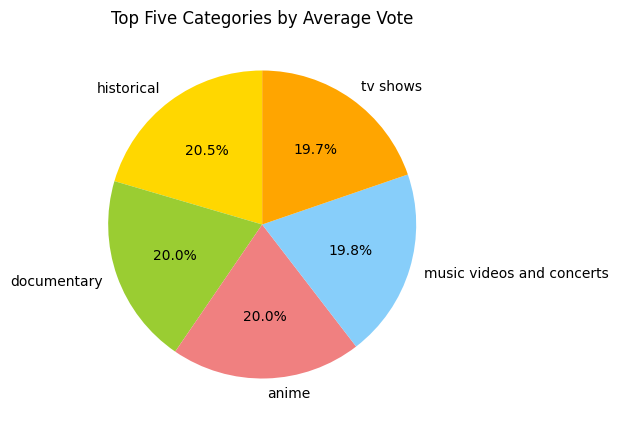

In [110]:
df = pd.DataFrame(list(top_five.items()), columns=['category', 'average_vote'])
fig, ax = plt.subplots(figsize=(5, 5))
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'orange']
ax.pie(df['average_vote'], labels=df['category'], autopct='%1.1f%%', colors=colors, startangle=90)
ax.set_title('Top Five Categories by Average Vote')
plt.show()


In [ ]:
Analysis on the estimated_data

fill missing vote_average and popularity rows with average walue

In [111]:
estimated_data['popularity'].fillna(estimated_data['popularity'].mean(), inplace=True)
estimated_data['vote_average'].fillna(estimated_data['vote_average'].mean(), inplace=True)
estimated_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,vote_average,popularity
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...,7.0,7.785000
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,7.4,1.422000
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...,4.2,4.711000
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ...",6.0,0.994000
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...,7.2,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",NaN,NaN,1940,7+,60 min,Comedy,New York City street principles get an East Si...,5.9,0.943000
9664,s9665,TV Show,Planet Patrol,NaN,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",NaN,NaN,2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve...",7.5,10.292908
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",NaN,NaN,2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou...",5.8,9.293000
9666,s9667,TV Show,Maradona: Blessed Dream,NaN,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",NaN,NaN,2021,TV-MA,1 Season,"Drama, Sports","The series tells the story of Diego Maradona, ...",7.1,16.880000


In [ ]:
add personal rating row

In [112]:
estimated_data['final_rating'] = estimated_data['popularity']*estimated_data['vote_average']/10
estimated_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,vote_average,popularity,final_rating
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...,7.0,7.785000,5.449500
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,7.4,1.422000,1.052280
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...,4.2,4.711000,1.978620
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ...",6.0,0.994000,0.596400
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...,7.2,0.600000,0.432000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",NaN,NaN,1940,7+,60 min,Comedy,New York City street principles get an East Si...,5.9,0.943000,0.556370
9664,s9665,TV Show,Planet Patrol,NaN,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",NaN,NaN,2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve...",7.5,10.292908,7.719681
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",NaN,NaN,2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou...",5.8,9.293000,5.389940
9666,s9667,TV Show,Maradona: Blessed Dream,NaN,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",NaN,NaN,2021,TV-MA,1 Season,"Drama, Sports","The series tells the story of Diego Maradona, ...",7.1,16.880000,11.984800


<Axes: title={'center': 'Top 5 movie categories by final rating'}, xlabel='category'>

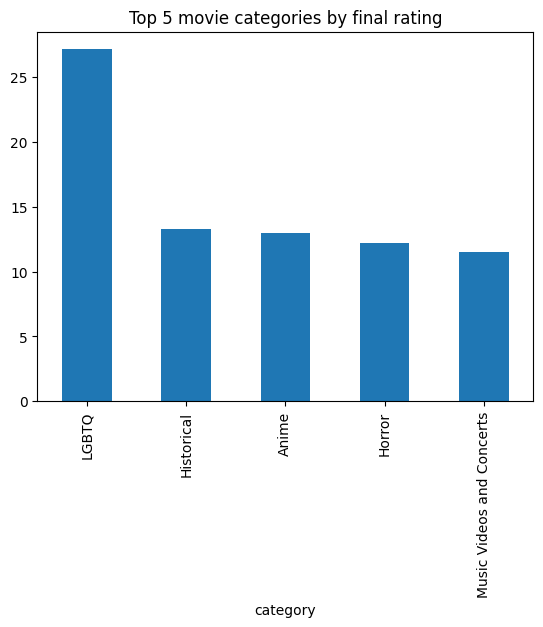

In [61]:
# split the categories column and create a new DataFrame with each category in a separate row
df_categories = estimated_data["listed_in"].str.split(", ", expand=True).stack().reset_index(level=1, drop=True).to_frame("category")

# merge the category DataFrame back into the original DataFrame and group by category to get the mean final rating for each category
category_ratings = pd.merge(estimated_data, df_categories, left_index=True, right_index=True).groupby("category")["final_rating"].mean()

# sort the categories by mean final rating and plot the top 5
category_ratings.nlargest(5).plot(kind="bar", title="Top 5 movie categories by final rating")


# getting the top 5 directors that will refer to the average rating of each director

In [ ]:
First analysis based on az_data

first we will make a copy of the complete_data dataframe and clear the NaN values of the listed_in column on the copy

In [113]:
data_directors = complete_data.copy()
data_directors.dropna(subset=['director'], inplace=True) 

Create dictionaries for counting directors and calculating average rating

In [114]:
countDirectorsDictionary = {}
dictionaryOfAverageRatings = {}

for index, row in data_directors.iterrows():
    director = row['director']
    directors = director.split(',')
    for director in directors:
        countDirectorsDictionary[director.lower().strip()] = countDirectorsDictionary.get(director.lower().strip(), 0) + 1
        dictionaryOfAverageRatings[director.lower().strip()] = dictionaryOfAverageRatings.get(director.lower().strip(), 0) + row['vote_average']
        
df_directors = pd.DataFrame({
    'director': list(countDirectorsDictionary.keys()),
    'count': list(countDirectorsDictionary.values()),
    'average_rating': list(dictionaryOfAverageRatings.values())
})

df_directors = df_directors.sort_values(by='count', ascending=False)
df_directors

,director,count,average_rating
166,jay chapman,32,212.5
164,manny rodriguez,21,146.7
604,john english,20,124.5
845,brian volk-weiss,17,115.7
87,joseph kane,12,69.2
...,...,...,...
2122,john albarian,1,7.5
2121,steve baker,1,6.9
2120,flavia casà,1,4.6
2119,lucas james mcgraw,1,5.7


Calculate the average vote for each director

In [115]:
finalResultsDirectors = dict()

for key, value in countDirectorsDictionary.items():
    finalResultsDirectors[key] = dictionaryOfAverageRatings[key] / countDirectorsDictionary[key]

df_directors = pd.DataFrame({
    'director': list(countDirectorsDictionary.keys()),
    'average_vote': list(finalResultsDirectors.values())
})

df_directors_votes = df_directors.sort_values(by='average_vote', ascending=False)
df_directors_votes

df_directors_votes

,director,average_vote
3146,maurice jones,9.6
1719,kimberley t. zulkowski,9.6
3271,katoria chanyasubkit,9.5
2904,emmanuel ndejito,9.4
2906,mark gullickson,9.4
...,...,...
3870,joshua wesely,1.1
2896,michele lunella,1.1
4930,selva vinayagam,1.0
4215,t.akash,1.0


sort the dictionary in descending order and get the top five directors

In [116]:
sorted_dict = sorted(finalResultsDirectors.items(), key=lambda x: x[1], reverse=True)
top_five_directors = dict(sorted_dict[:5])

df_directors_topFive = pd.DataFrame({
    'director': list(top_five_directors.keys()),
    'average_vote': list(top_five_directors.values())
})

df_directors_votes = df_directors.sort_values(by='average_vote', ascending=False)

df_directors_topFive

,director,average_vote
0,kimberley t. zulkowski,9.6
1,maurice jones,9.6
2,katoria chanyasubkit,9.5
3,emmanuel ndejito,9.4
4,joseph duke,9.4


Create a dataframe for the top five directors in order to represent them in a horizontal chart

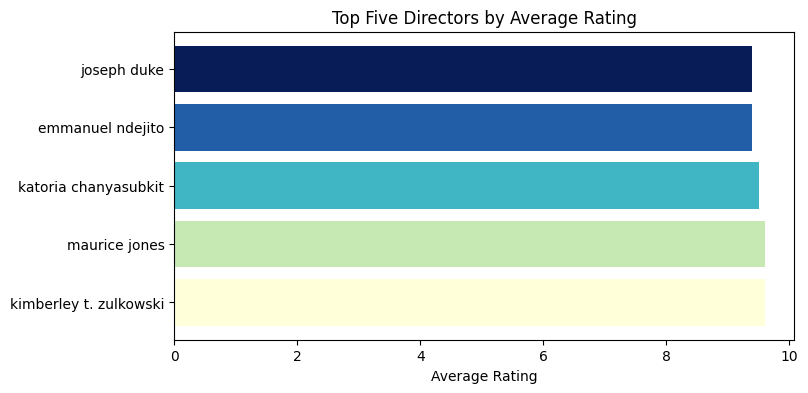

In [117]:
df_directors = pd.DataFrame(list(top_five_directors.items()), columns=['director', 'average_rating'])

colors = plt.cm.YlGnBu(np.linspace(0, 1, len(df_directors)))

fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(df_directors['director'], df_directors['average_rating'], color=colors)
ax.set_xlabel('Average Rating')
ax.set_title('Top Five Directors by Average Rating')
plt.show()

In [ ]:
second analysis based on the estimated_data

Group the dataframe by director and calculate the mean of final_rating

In [118]:
director_ratings = estimated_data.groupby('director')['final_rating'].mean()

Get the top 5 directors with the highest mean final_rating

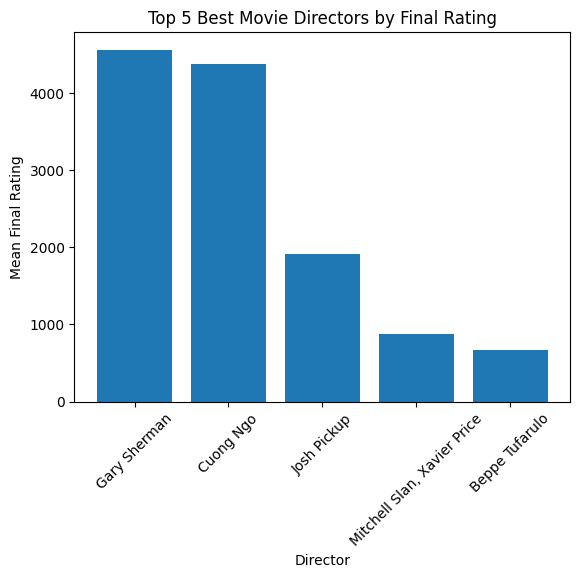

In [120]:
top_directors = director_ratings.nlargest(5)

# Create a bar chart to visualize the data
fig, ax = plt.subplots()
ax.bar(top_directors.index, top_directors.values)

# Set the title and axis labels
ax.set_title('Top 5 Best Movie Directors by Final Rating')
ax.set_xlabel('Director')
ax.set_ylabel('Mean Final Rating')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the chart
plt.show()

Identifying similar content by matching text features

first we will apply the cosine similarity to the whole csv file

In [121]:
file_path = "./amazon_data_VA.csv"
sim_data = pd.read_csv(file_path,parse_dates=True)

separate the sim_data into two dataframes one for movies and one for TV shows

In [70]:
movie_dataframe = sim_data[sim_data['type'] == "Movie"]

movie_dataframe = movie_dataframe.reset_index(drop=True)

serie_dataframe = sim_data[sim_data['type'] == "TV Show"]

serie_dataframe = serie_dataframe.reset_index(drop=True)

For the movie data frame

Create a TfidfVectorizer object to transform the text data into a matrix of TF-IDF features

In [73]:
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(movie_dataframe['description'])

Compute cosine similarity (that will present the scores of similarities) for all pairs of descriptions in the dataset

In [74]:
cosine_similarities = cosine_similarity(tfidf_matrix)
cosine_similarities

array([[1.        , 0.01788359, 0.01111306, ..., 0.02116291, 0.00856351,
        0.01220817],
       [0.01788359, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01111306, 0.        , 1.        , ..., 0.07383554, 0.00385639,
        0.033853  ],
       ...,
       [0.02116291, 0.        , 0.07383554, ..., 1.        , 0.01779757,
        0.        ],
       [0.00856351, 0.        , 0.00385639, ..., 0.01779757, 1.        ,
        0.00949135],
       [0.01220817, 0.        , 0.033853  , ..., 0.        , 0.00949135,
        1.        ]])

viewing the cosine similarity in a dataframe

In [75]:
similarity_df_movies = pd.DataFrame(cosine_similarities, columns=movie_dataframe['title'], index=movie_dataframe['title'])
similarity_df_movies

title,The Grand Seduction,Take Care Good Night,Secrets of Deception,Pink: Staying True,Monster Maker,Living With Dinosaurs,Hired Gun,Grease Live!,Global Meltdown,David's Mother,...,Dard Divorce,Anaganaga Oka Nenu,A Place at the Table,12 Dates of Christmas,10 Things I Hate About You,The Man in the Hat,River,Pride Of The Bowery,Outpost,Harry Brown
title,,,,,,,,,,,,,,,,,,,,,
The Grand Seduction,1.000000,0.017884,0.011113,0.025198,0.029693,0.027693,0.048904,0.039072,0.022049,0.029657,...,0.023329,0.039906,0.021403,0.021615,0.017706,0.024191,0.007025,0.021163,0.008564,0.012208
Take Care Good Night,0.017884,1.000000,0.000000,0.008126,0.004363,0.003446,0.027608,0.023622,0.005879,0.005999,...,0.008906,0.011886,0.012371,0.003977,0.000000,0.002506,0.000000,0.000000,0.000000,0.000000
Secrets of Deception,0.011113,0.000000,1.000000,0.012372,0.063216,0.043643,0.006161,0.007029,0.021772,0.008472,...,0.010423,0.052242,0.016563,0.012260,0.037218,0.057971,0.137160,0.073836,0.003856,0.033853
Pink: Staying True,0.025198,0.008126,0.012372,1.000000,0.023217,0.022145,0.036800,0.030852,0.016201,0.030442,...,0.074307,0.043048,0.021167,0.008362,0.052004,0.015291,0.039701,0.037506,0.020173,0.006884
Monster Maker,0.029693,0.004363,0.063216,0.023217,1.000000,0.076307,0.033990,0.013919,0.014390,0.020463,...,0.010800,0.070767,0.010000,0.003107,0.053002,0.033403,0.015159,0.000000,0.001858,0.056941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
The Man in the Hat,0.024191,0.002506,0.057971,0.015291,0.033403,0.041917,0.032807,0.011196,0.023042,0.019723,...,0.010150,0.040840,0.037897,0.026470,0.010868,1.000000,0.007082,0.015594,0.026211,0.022508
River,0.007025,0.000000,0.137160,0.039701,0.015159,0.027029,0.016978,0.011662,0.020988,0.062357,...,0.047743,0.025385,0.023720,0.056247,0.022115,0.007082,1.000000,0.000000,0.028189,0.056248
Pride Of The Bowery,0.021163,0.000000,0.073836,0.037506,0.000000,0.023023,0.000000,0.025247,0.010890,0.000000,...,0.000000,0.000000,0.005539,0.000000,0.042934,0.015594,0.000000,1.000000,0.017798,0.000000


iterate over each row in the dataframe and get for each description a list of similarities but only those who got 70% of score and plus matching

In [76]:
results_dict_movies = {}

for i, desc in enumerate(movie_dataframe['description']):
    # Find the cosine similarity scores of the descriptions that are most similar to this one
    similar_scores = cosine_similarities[i].tolist()
    
    similar_indices = cosine_similarities[i].argsort()[::-1]
    
    high_similarity_indices = [idx for idx, score in enumerate(similar_scores) if score >=0.7 and idx != i]
    
    if len(high_similarity_indices) < 3:
        high_similarity_indices.extend([np.nan] * (3 - len(high_similarity_indices)))
        
    # Create a nested dictionary to store the similar titles and scores
    
    similar_dict = {}
    for j in high_similarity_indices:
        if(pd.isna(j) == False):
            title = movie_dataframe.loc[j]['title']
            score = cosine_similarities[i, j]
            similar_dict[title] = f"{round(score*100,2)} %"
            
                    
    results_dict_movies[movie_dataframe.loc[i]['title']] = similar_dict


now we will represent the similarities in a dataframe that will show us in rows(title) 
and columns(list of titles of similarities in description)

In [77]:
df_results = pd.DataFrame.from_dict(results_dict_movies, orient='index')
df_results

,Social Animals,Yoga for Relaxation Anywhere,Yoga Savasana Relaxation,Alternate Nostril Breathing,6 Minutes of Yoga By The Ocean,Yatra (Malayalam),Yatra (Tamil),Yatra (Telugu),Where is Chicky? - Chapter One,Where is Chicky? - Chapter Six,...,Date Night (Extended Cut),What Happens in Vegas,What Happens in Vegas (Extended Edition),Thalaivii (Tamil),Thalaivii (Malayalam),Thalaivii (Kannada),Thalaivii (Telugu),SNOW WHITE,Knight and Day,Date Night
Grease Live!,100.0 %,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yoga Savasana Relaxation,NaN,70.46 %,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yoga for Relaxation Anywhere,NaN,NaN,70.46 %,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yoga for Breath Awareness,NaN,NaN,NaN,100.0 %,78.26 %,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6 Minutes of Yoga By The Ocean,NaN,NaN,NaN,78.26 %,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Thalaivii (Kannada),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,100.0 %,100.0 %,NaN,100.0 %,NaN,NaN,NaN
Thalaivii (Tamil),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,100.0 %,100.0 %,100.0 %,NaN,NaN,NaN
Snow White,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0 %,NaN,NaN
Knight and Day (Extended Edition),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.99 %,NaN


For the series data frame 

Create a TfidfVectorizer object to transform the text data into a matrix of TF-IDF features

In [78]:
tfidf = TfidfVectorizer()
tfidf_matrix_series = tfidf.fit_transform(serie_dataframe['description'])

Compute cosine similarity for all pairs of descriptions in the dataset of series

In [79]:
cosine_similarities = cosine_similarity(tfidf_matrix_series)
cosine_similarities

array([[1.        , 0.03653154, 0.0133404 , ..., 0.03470883, 0.0236873 ,
        0.03579985],
       [0.03653154, 1.        , 0.0171297 , ..., 0.03225722, 0.02218459,
        0.01685743],
       [0.0133404 , 0.0171297 , 1.        , ..., 0.01005079, 0.01812592,
        0.01028704],
       ...,
       [0.03470883, 0.03225722, 0.01005079, ..., 1.        , 0.0525011 ,
        0.0273701 ],
       [0.0236873 , 0.02218459, 0.01812592, ..., 0.0525011 , 1.        ,
        0.00971633],
       [0.03579985, 0.01685743, 0.01028704, ..., 0.0273701 , 0.00971633,
        1.        ]])

now we will represent the cosine similarities of all series 

In [80]:
similarity_df_series = pd.DataFrame(cosine_similarities, columns=serie_dataframe['title'], index=serie_dataframe['title'])
similarity_df_series

title,Zoo Babies,Zoë Coombs Marr: Bossy Bottom,Zoboomafoo,Zo Zo Zombie: Mini-Series,ZeroZeroZero,Zahara: The Return,Z: The Beginning of Everything,Yu-Gi-Oh! Zexal,Yu-Gi-Oh! ARC-V,Yu-Gi-Oh! 5D's,...,Pokémon the Series: Diamond and Pearl,Paul Newman Trilogy,Lunkerville,Let's Go Cozy Coupe! - Cartoons for Kids,Kids In The Hall,Glass Room,DaFUNdamentals Series,Terrahawks,Planet Patrol,Maradona: Blessed Dream
title,,,,,,,,,,,,,,,,,,,,,
Zoo Babies,1.000000,0.036532,0.013340,0.028012,0.041810,0.063672,0.041467,0.041701,0.017257,0.060837,...,0.031143,0.042571,0.037481,0.058984,0.064293,0.036408,0.043350,0.034709,0.023687,0.035800
Zoë Coombs Marr: Bossy Bottom,0.036532,1.000000,0.017130,0.037604,0.031365,0.033992,0.020711,0.032340,0.013292,0.041562,...,0.024306,0.038253,0.026251,0.021936,0.034930,0.043367,0.017992,0.032257,0.022185,0.016857
Zoboomafoo,0.013340,0.017130,1.000000,0.003777,0.026028,0.018189,0.016131,0.028557,0.054570,0.021254,...,0.031565,0.016702,0.025071,0.019146,0.023535,0.020119,0.011192,0.010051,0.018126,0.010287
Zo Zo Zombie: Mini-Series,0.028012,0.037604,0.003777,1.000000,0.014152,0.021428,0.008767,0.026239,0.003233,0.043629,...,0.010523,0.047863,0.018791,0.023757,0.039976,0.027667,0.033023,0.006725,0.014927,0.011496
ZeroZeroZero,0.041810,0.031365,0.026028,0.014152,1.000000,0.039087,0.041264,0.052472,0.027966,0.047588,...,0.049162,0.035514,0.018497,0.027170,0.070697,0.035879,0.028984,0.027309,0.030505,0.044967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Glass Room,0.036408,0.043367,0.020119,0.027667,0.035879,0.093835,0.022026,0.027564,0.004419,0.054199,...,0.062311,0.036361,0.036287,0.023400,0.054706,1.000000,0.019833,0.021802,0.029542,0.025521
DaFUNdamentals Series,0.043350,0.017992,0.011192,0.033023,0.028984,0.008022,0.009027,0.009276,0.000000,0.047555,...,0.010779,0.028703,0.029363,0.097760,0.030641,0.019833,1.000000,0.010662,0.011860,0.028145
Terrahawks,0.034709,0.032257,0.010051,0.006725,0.027309,0.032638,0.076780,0.059908,0.035006,0.028714,...,0.032616,0.025877,0.025388,0.013682,0.039965,0.021802,0.010662,1.000000,0.052501,0.027370


iterate over each row in the dataframe and get for each description 
a list of similarities but only those who got 70% of score and plus matching

In [81]:

results_dict_series = {}
for i, desc in enumerate(serie_dataframe['description']):
    
    similar_scores = cosine_similarities[i].tolist()
    
    similar_indices = cosine_similarities[i].argsort()[::-1]
    
    high_similarity_indices = [idx for idx, score in enumerate(similar_scores) if score >=0.7 and idx != i]
    
    if len(high_similarity_indices) < 3:
        high_similarity_indices.extend([np.nan] * (3 - len(high_similarity_indices)))
        
    
    similar_dict = {}
    for j in high_similarity_indices:
        if(pd.isna(j) == False):
            title = serie_dataframe.loc[j]['title']
            score = cosine_similarities[i, j]
            similar_dict[title] = f"{round(score*100,2)} %"
            
                    
    results_dict_series[serie_dataframe.loc[i]['title']] = similar_dict

now we will represent the similarities in a dataframe that will show us in rows(title) 
and columns(list of titles of similarities in description) (if nothing is represented it means that there is no matching above 70 %)

In [82]:
df_results_series = pd.DataFrame.from_dict(results_dict_series, orient='index')
df_results_series

,I've Got A Secret,Vella Raja (Hindi),Thella Raju (Telugu),Vella Raja (Tamil),Troy The Train,Time Enna Boss,Time Enna Boss (Telugu),The Neighbors [English Subbed] (4K UHD),The Neighbors [English Subtitled],Sunshine Sento-Sake (Subbed),...,Fernando (Dubbed),Fernando,Fernando 4K UHD (Dubbed),Subete a mi Moto,Subete a mi Moto (4K UHD),Go Buster - Classic Nursery Rhymes & Songs (Made by Little Baby Bum),Act 6 - Series 1,Act 6 - Series 2,My Magic Pet Morphle - Songs for Kids,Go Buster - Adventures of Go Buster (Made by Little Baby Bum)
What's My Line?,81.29 %,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vella Raja (Tamil),NaN,100.0 %,100.0 %,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Thella Raju (Telugu),NaN,100.0 %,NaN,100.0 %,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vella Raja (Hindi),NaN,NaN,100.0 %,100.0 %,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Troy the Train,NaN,NaN,NaN,NaN,71.43 %,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Go Buster - Adventures of Go Buster (Made by Little Baby Bum),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,82.76 %,NaN,NaN,NaN,NaN
Act 6 - Series 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,100.0 %,NaN,NaN,NaN
Act 6 - Series 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0 %,NaN,NaN
My Magic Pet Morphle - Adventures of Mila & Morphle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.66 %,NaN


# Top ten actors :

In [ ]:
First analysis based on az_data

In [122]:
data_actors = complete_data.copy()
data_actors.dropna(subset=['cast'], inplace=True)
data_actors

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,vote_average
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...,7.0
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,7.4
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...,4.2
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ...",6.0
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...,7.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",NaN,NaN,1940,7+,60 min,Comedy,New York City street principles get an East Si...,5.9
9664,s9665,TV Show,Planet Patrol,NaN,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",NaN,NaN,2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve...",7.5
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",NaN,NaN,2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou...",5.8
9666,s9667,TV Show,Maradona: Blessed Dream,NaN,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",NaN,NaN,2021,TV-MA,1 Season,"Drama, Sports","The series tells the story of Diego Maradona, ...",7.1


 count the number of movies or tv shows for each actor 

In [123]:
cast_dict = dict()
# iterate over each row in the dataframe
for index, row in data_actors.iterrows():
    # split the cast string into a list of names
    cast_list = str(row['cast']).split(',')
    # iterate over each cast member
    for cast_member in cast_list:
        # remove leading/trailing whitespace from the cast member name
        cast_member = cast_member.strip()
        # add the cast member name to the dictionary or update its count
        cast_dict[cast_member] = cast_dict.get(cast_member, 0) + 1 


visualize the frequency of appearances of different actors in movies and tv shows

In [124]:
df_actors = pd.DataFrame.from_dict(cast_dict, orient='index', columns=['Appearance'])

# add a new column 'Actor' based on the index of the DataFrame
df_actors['Actor'] = df_actors.index

# reset the index of the DataFrame to integers
df_actors.reset_index(drop=True, inplace=True)

# reorder the columns to have 'Actor' first
df_actors = df_actors[['Actor', 'Appearance']]
df_actors 

,Actor,Appearance
0,Brendan Gleeson,5
1,Taylor Kitsch,2
2,Gordon Pinsent,5
3,Mahesh Manjrekar,4
4,Abhay Mahajan,1
...,...,...
28916,Laura Esquivel,1
28917,Nicolás Furtado,1
28918,Nicolas Goldschmidt,1
28919,Joseph Gilgun,1


calculate the average rating for movies and tv shows for each actor

In [125]:
def getAvgRating(actor, count): 
    ratings = data_actors.loc[data_actors['cast'].str.extract(fr'\b({re.escape(actor)})\b', flags=re.IGNORECASE, expand=False).notna(), 'vote_average']

    if count == 0 or len(ratings) == 0 :
        return 0.0
    return ratings.mean()

# Iterate over the items in the dictionary and update the values in place
for actor, nbmovies in cast_dict.items():
    cast_dict[actor] = getAvgRating(actor, nbmovies)

In [126]:
 
df_actors = pd.DataFrame.from_dict(cast_dict, orient='index', columns=['Average Rating'])

# add a new column 'Actor' based on the index of the DataFrame
df_actors['Actor'] = df_actors.index

# reset the index of the DataFrame to integers
df_actors.reset_index(drop=True, inplace=True)

# reorder the columns to have 'Actor' first
df_actors = df_actors[['Actor', 'Average Rating']]
df_actors

,Actor,Average Rating
0,Brendan Gleeson,6.420
1,Taylor Kitsch,6.950
2,Gordon Pinsent,6.320
3,Mahesh Manjrekar,5.925
4,Abhay Mahajan,7.400
...,...,...
28916,Laura Esquivel,7.100
28917,Nicolás Furtado,7.100
28918,Nicolas Goldschmidt,7.100
28919,Joseph Gilgun,7.200


sorting the cast dictionary by Average Rating , and then slicing the top 10 actors with the highest Average Rating  

In [127]:
sorted_rating = sorted(cast_dict.items(), key=lambda x: x[1], reverse=True)
sorted_rating
# get the first 10 values
sorted_rating = sorted_rating[:10] 

top_10_actors ={}
for key, value in sorted_rating:
     top_10_actors[key] = value 

df_actors = pd.DataFrame.from_dict(top_10_actors, orient='index', columns=['Average Rating'])

# add a new column 'Actor' based on the index of the DataFrame
df_actors['Actor'] = df_actors.index

# reset the index of the DataFrame to integers
df_actors.reset_index(drop=True, inplace=True)

# reorder the columns to have 'Actor' first
df_actors = df_actors[['Actor', 'Average Rating']]
df_actors

,Actor,Average Rating
0,Imani Brown,9.6
1,Carnellious Gill,9.6
2,Terrell Lewis,9.6
3,Dinah Williams,9.6
4,Paulos Hughes,9.6
5,Erick Perkins,9.6
6,Charles D. Clark,9.6
7,Chandra Smartt Spicer,9.6
8,Christopher A. Greer,9.6
9,Shanta Renee Smith,9.6


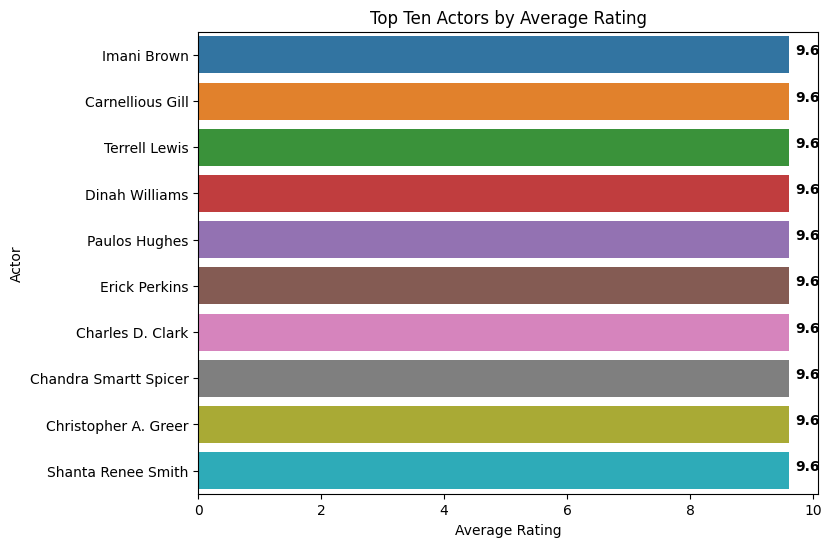

In [128]:
# Set the width and height of the figure
plt.figure(figsize=(8, 6))

# Sort the data by average rating
df_actors.sort_values(by='Average Rating', ascending=False, inplace=True)

# Create a horizontal bar chart
ax = sns.barplot(x='Average Rating', y='Actor', data=df_actors)

# Add labels and title
plt.xlabel('Average Rating')
plt.ylabel('Actor')
plt.title('Top Ten Actors by Average Rating')

# Add rating values to the end of each bar
for i, v in enumerate(df_actors['Average Rating']):
    ax.text(v + 0.1, i, str(v), color='black', fontweight='bold')

# Show the plot
plt.show()


In [ ]:
Second analysis based on the estimated_data

In [ ]:
Split the cast column into separate rows

In [129]:
cast_data = estimated_data["cast"].str.split(", ", expand=True).stack().reset_index(level=1, drop=True).rename("actor")

Join the actor data with the original data

In [130]:
merged_data = estimated_data.join(cast_data)

Group the data by actor and calculate the mean of final_rating

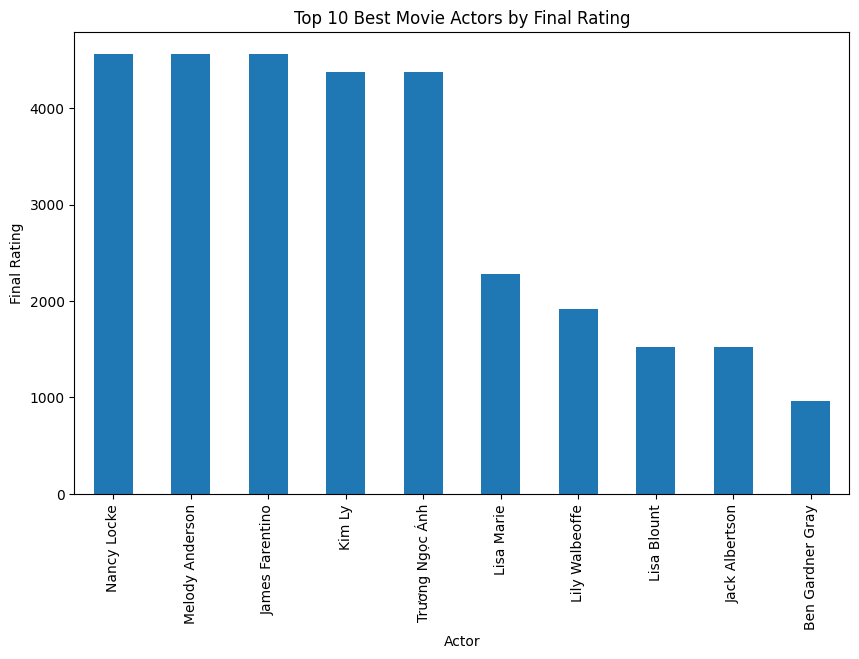

In [131]:
actor_ratings = merged_data.groupby("actor")["final_rating"].mean().sort_values(ascending=False)[:10]

# Create a bar chart of the top 10 actors
actor_ratings.plot(kind="bar", figsize=(10, 6))
plt.title("Top 10 Best Movie Actors by Final Rating")
plt.xlabel("Actor")
plt.ylabel("Final Rating")
plt.show()

# Top five TV shows with the most seasons

First analysis based on az_data

 Filters rows to only include TV shows 

In [132]:
tvshows_data = complete_data[complete_data['type'].str.contains('TV Show')].copy()
tvshows_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,vote_average
18,s19,TV Show,Zoë Coombs Marr: Bossy Bottom,Simon Francis,Zoë Coombs Marr,NaN,NaN,2020,18+,1 Season,"Comedy, Talk Show and Variety",Zoë Coombs Marr has been on hiatus. Sort of. F...,6.600
20,s21,TV Show,Zoboomafoo,NaN,"Martin Kratt, Chris Kratt, Gord Robertson",NaN,NaN,2001,TV-Y,1 Season,Kids,Chris and Martin Kratt bring their enthusiasm ...,7.600
23,s24,TV Show,ZeroZeroZero,NaN,"ANDREA RISEBOROUGH, HAROLD TORRES, CLAUDIA PIN...",Italy,NaN,2020,18+,1 Season,TV Shows,ZeroZeroZero series follows the journey of a c...,8.100
26,s27,TV Show,Zahara: The Return,NaN,"Natasha Heschélle, Curtis Morgan, Hannah Scott...",NaN,NaN,2020,16+,1 Season,TV Shows,The story explores the history of slavery and ...,8.600
27,s28,TV Show,Z: The Beginning of Everything,NaN,"Christina Ricci , David Hoflin",United States,NaN,2017,18+,1 Season,"Comedy, Drama","""Z: The Beginning of Everything"" tells the sto...",7.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9635,s9636,TV Show,Pokémon the Series: Diamond and Pearl,NaN,Ikue Ohtani,NaN,"October 10, 2021",2011,ALL,12 Seasons,"Animation, Kids","Ash, Dawn, and Brock continue to travel across...",7.697
9647,s9648,TV Show,Kids In The Hall,NaN,"David Foley, Bruce McCulloch, Kevin McDonald",NaN,"October 10, 2021",1995,TV-14,5 Seasons,"Arts, Entertainment, and Culture, Comedy","""The Kids in the Hall"" is a unique and bizarre...",8.400
9661,s9662,TV Show,Terrahawks,NaN,"DENISE BRYER, WINDSOR DAVIES, JEREMY HITCHEN, ...",NaN,NaN,1983,ALL,3 Seasons,TV Shows,"This thrilling, action-packed series saw Gerry...",7.200
9664,s9665,TV Show,Planet Patrol,NaN,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",NaN,NaN,2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve...",7.500


In [133]:
num_nans = tvshows_data.isna().sum()
print(num_nans)

show_id            0
type               0
title              0
director        1221
cast              44
country         1234
date_added      1252
release_year       0
rating             3
duration           0
listed_in          0
description        0
vote_average       0
dtype: int64


Extracting the title , Rating , duration columns

In [134]:
tvshows_dict=dict()
for index, row in tvshows_data.iterrows(): 
    title = str(row['title'])
    # iterate over each cast member
    seasons = re.search(r'\d+', row['duration']).group()
    rating_saisons = [float(row['vote_average']),int(seasons)]
    tvshows_dict[title]=rating_saisons

create a DataFrame with the rating and number of seasons for each TV show in the tvshows_dict dictionary

In [135]:
# Convert to DataFrame
df_tvshows = pd.DataFrame.from_dict(dict(tvshows_dict), orient='index', columns=['vote_average', 'Seasons'])

# Add a new column 'Tv_show' based on the index of the DataFrame
df_tvshows['Tv_show'] = df_tvshows.index

# Reset the index of the DataFrame to integers
df_tvshows.reset_index(drop=True, inplace=True)

# Reorder the columns to have 'Tv_show' first
df_tvshows = df_tvshows[['Tv_show', 'vote_average', 'Seasons']]

# Display the DataFrame
df_tvshows

,Tv_show,vote_average,Seasons
0,Zoë Coombs Marr: Bossy Bottom,6.600,1
1,Zoboomafoo,7.600,1
2,ZeroZeroZero,8.100,1
3,Zahara: The Return,8.600,1
4,Z: The Beginning of Everything,7.000,1
...,...,...,...
1332,Pokémon the Series: Diamond and Pearl,7.697,12
1333,Kids In The Hall,8.400,5
1334,Terrahawks,7.200,3
1335,Planet Patrol,7.500,4


Sort TV shows by their ratings and retrieves the top 5

In [136]:
df_tvshows_sorted = df_tvshows.sort_values(by='vote_average', ascending=False) 
# Get the first 5 TV shows
df_tvshows_sorted = df_tvshows_sorted.head()
df_tvshows_sorted

,Tv_show,vote_average,Seasons
1275,Jessy & Nessy,9.5,4
145,The Prince Family,9.5,1
681,Fishing With Dan Hernandez,9.4,1
260,Subaru Launch Control,9.4,3
1146,Aham Bhramhasmi,9.3,1


Sort TV shows by number of seasons and retrieves the top 5

In [137]:
# Sort the TV shows by number of seasons in descending order
df_tvshows_sorted = df_tvshows_sorted.sort_values(by='Seasons', ascending=False) 
# Get the top 5 TV shows
df_tvshows_sorted = df_tvshows_sorted.head() 
df_tvshows_sorted

,Tv_show,vote_average,Seasons
1275,Jessy & Nessy,9.5,4
260,Subaru Launch Control,9.4,3
145,The Prince Family,9.5,1
681,Fishing With Dan Hernandez,9.4,1
1146,Aham Bhramhasmi,9.3,1


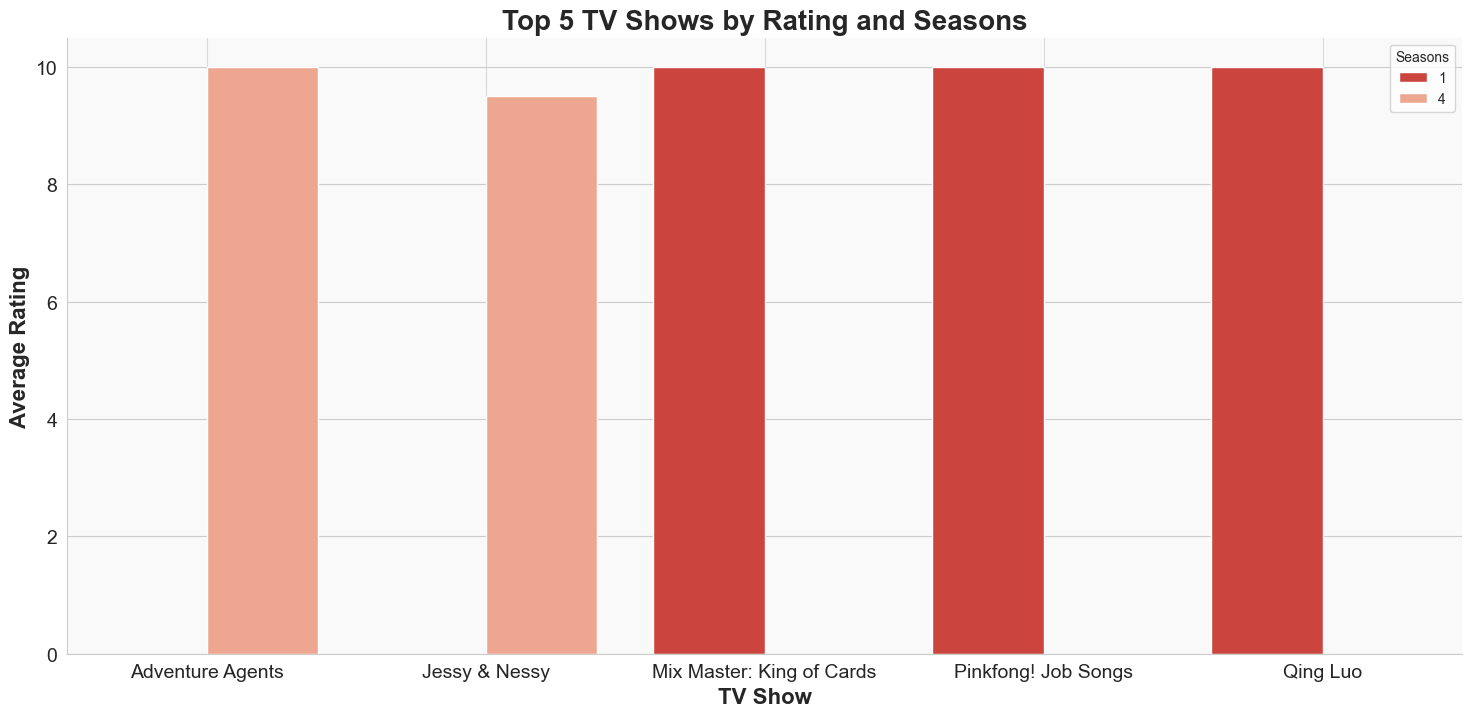

In [96]:
# Create the horizontal bar plot
plt.figure(figsize=(18, 8))
sns.set_style("whitegrid")
ax = sns.barplot(y="vote_average", x="Tv_show", hue="Seasons", data=df_tvshows_sorted, palette="Reds_r" )

# Set the title and axis labels
plt.title("Top 5 TV Shows by Rating and Seasons", fontsize=20, fontweight="bold")
plt.xlabel("TV Show", fontsize=16, fontweight="bold")
plt.ylabel("Average Rating", fontsize=16, fontweight="bold")

# Set the tick label properties
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add a grid to the plot
plt.grid(axis="x", linestyle="-", alpha=0.7)

# Remove the top and right spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Set the background color
plt.gca().set_facecolor("#f9f9f9")

# Show the plot
plt.show()


In [ ]:
Second analysis based on estimated_data

filter the dataframe to only include TV shows

In [138]:
tv_shows = estimated_data[estimated_data['type'] == 'TV Show'].copy()

extract the number of seasons from the 'duration' column and convert it to integer

In [139]:
tv_shows['num_seasons'] = tv_shows['duration'].str.extract('(\d+)', expand=False).astype(int)

group by TV show title and select the maximum number of seasons

<Axes: title={'center': 'Top 5 TV Shows with the Highest Number of Seasons'}, xlabel='title'>

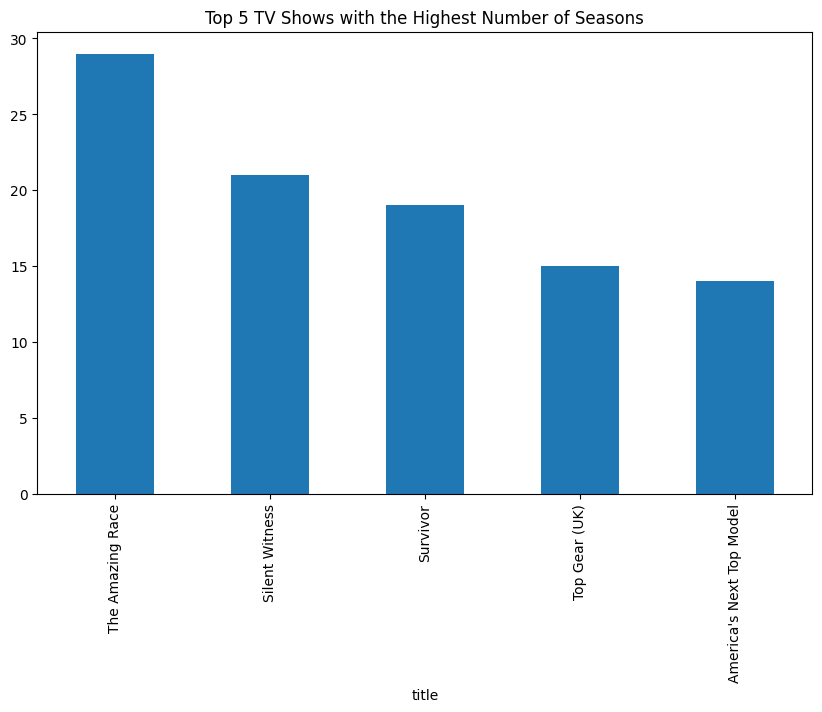

In [140]:
top_tv_shows = tv_shows.groupby('title')['num_seasons'].max().nlargest(5)

# plot the results as a bar chart
top_tv_shows.plot(kind='bar', figsize=(10, 6), title='Top 5 TV Shows with the Highest Number of Seasons')

# Has Amazon focused more on TV series than movies in 2021

In [141]:
date_data = pd.read_csv("./amazon_data_VA.csv")  

# Drop the rows where 'date_added' column is NaN
date_data.dropna(subset=['date_added'], inplace=True)  
date_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,vote_average
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...,7.000
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,7.400
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...,4.200
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ...",6.000
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...,7.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9537,s9538,TV Show,Pan y Circo,NaN,"Diego Luna, Julia Carabias, Daptnhe Cuevas",NaN,"October 8, 2021",2021,7+,2 Seasons,"Special Interest, Talk Show and Variety, Unscr...",Mexican actor and director Diego Luna returns ...,6.600
9546,s9547,TV Show,Hidden Villages,NaN,Penelope Keith,NaN,"October 8, 2021",2016,ALL,2 Seasons,"Documentary, Special Interest","In this series, renowned actress Dame Penelope...",8.600
9635,s9636,TV Show,Pokémon the Series: Diamond and Pearl,NaN,Ikue Ohtani,NaN,"October 10, 2021",2011,ALL,12 Seasons,"Animation, Kids","Ash, Dawn, and Brock continue to travel across...",7.697
9642,s9643,TV Show,Lunkerville,NaN,Michael de Avila,NaN,"October 10, 2021",2021,13+,2 Seasons,"Documentary, Special Interest, Sports","Lunkerville's launches ""Get Folks Fishing"", a ...",NaN


creates a DataFrame that stores the count of TV shows and movies by year

In [142]:
# Get the count of TV shows and movies by year
tvshow_counts = date_data[date_data["type"] == "TV Show"].groupby(pd.to_datetime(date_data["date_added"]).dt.year).size()
movie_counts = date_data[date_data["type"] == "Movie"].groupby(pd.to_datetime(date_data["date_added"]).dt.year).size()

# Create a DataFrame to store the counts
counts_df = pd.DataFrame({'TV Shows': tvshow_counts, 'Movies': movie_counts}).reset_index()
# Rename the 'date_added' column to 'Year'
counts_df = counts_df.rename(columns={'date_added': 'Year'}) 
# Display the DataFrame
counts_df 

,Year,TV Shows,Movies
0,2021,139,16


based on the results of the previous dataframe we do not have enough info about years we only have 2021 which will 
not be enough to represent how amazon focuses on movies or series but we will analyze it based on months of that year which is
2021

In [143]:
date_data["date_added"] = pd.to_datetime(date_data["date_added"], format="%B %d, %Y")

# group the data by year and month, and count the number of titles in each group
title_counts = date_data.groupby([date_data["date_added"].dt.year, date_data["date_added"].dt.month, date_data["type"]]).size()
# convert the resulting multi-index series to a pandas DataFrame
title_counts_df = title_counts.unstack(level=-1)
title_counts_df 

type                   Movie  TV Show
date_added date_added                
2021       3             9.0      5.0
           4             5.0     10.0
           5             1.0     11.0
           6             1.0     25.0
           7             NaN     16.0
           8             NaN     24.0
           9             NaN     29.0
           10            NaN     19.0

plot the number of titles by month for each movie or tv show

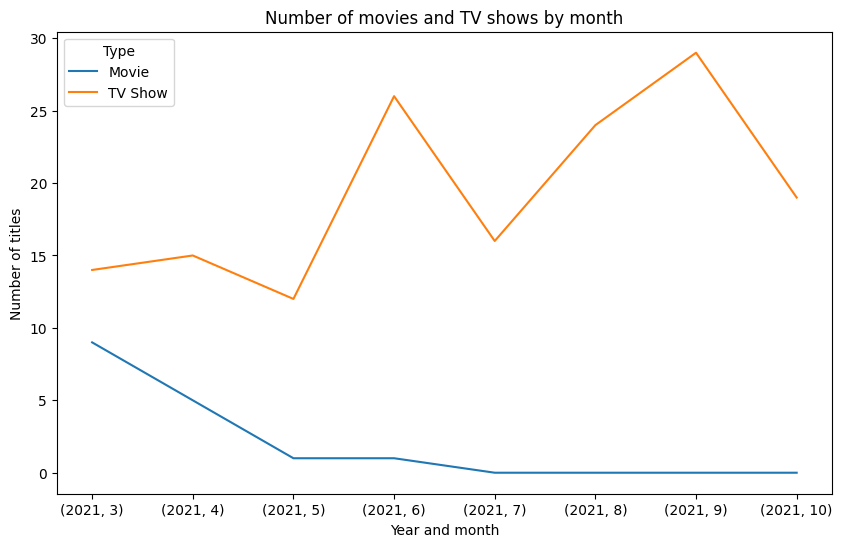

In [144]:
# Plot a line chart
title_counts_df.plot(kind="line", stacked=True, figsize=(10, 6))
# Set the title, labels and legend
plt.title("Number of movies and TV shows by month")
plt.xlabel("Year and month")
plt.ylabel("Number of titles")
plt.legend(title="Type", labels=["Movie", "TV Show"])

# Display the chart
plt.show()


the number of TV shows added was consistently higher than the number of movies added

create a pie chart showing the percentage of TV shows and movies added by Amazon in 2021

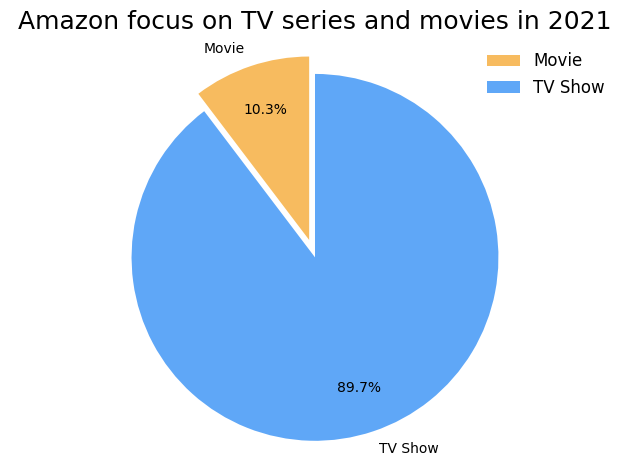

In [145]:
dat = date_data['date_added'].value_counts() 

# convert the "date_added" column to datetime format
date_data["date_added"] = pd.to_datetime(date_data["date_added"], format="%B %d, %Y")

# filter the data for the year 2021
data_2021 = date_data[date_data["date_added"].dt.year == 2021]

# group the data by type and count the number of TV shows and movies
grouped_data = data_2021.groupby("type").size()

# calculate the percentage of TV shows and movies out of the total
total = grouped_data.sum()
percentages = grouped_data.apply(lambda x: 100 * x / total)

# plot the percentages on a pie chart
labels = ["Movie", "TV Show"]
colors = ['#f7bb5f', '#5fa7f7']
explode = (0.05, 0.05)
plt.pie(percentages, labels=labels, explode=explode, colors=colors, autopct="%1.1f%%", 
        startangle=90, pctdistance=0.75, labeldistance=1.1)
plt.title("Amazon focus on TV series and movies in 2021", fontsize=18)
plt.axis('equal')
plt.legend(loc="upper right", fontsize=12, frameon=False)
plt.tight_layout()
plt.show()
